# Dataset Reference 
Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.

In [215]:
pip install ucimlrepo
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Import the dataset

In [216]:
from ucimlrepo import fetch_ucirepo 


# Import Libraries

In [217]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Fetch and read dataset 

In [218]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
df = adult.data
# data (as pandas dataframes) 
X = df.features 
y = df.targets 

In [219]:
# metadata 
adult.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Mon Aug 07 2023',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the follow

In [220]:
# variable information 
adult.variables 

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [221]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [222]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


# Preprocessing

In [223]:
X.count()

age               48842
workclass         47879
fnlwgt            48842
education         48842
education-num     48842
marital-status    48842
occupation        47876
relationship      48842
race              48842
sex               48842
capital-gain      48842
capital-loss      48842
hours-per-week    48842
native-country    48568
dtype: int64

In [224]:
X.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [225]:
y.isnull().sum()

income    0
dtype: int64

In [226]:
rows_with_missing_values = X[X.isnull().any(axis=1)]
print("\nRows with missing values:")
print(rows_with_missing_values)


Rows with missing values:
       age  workclass  fnlwgt     education  education-num  \
32565   18        NaN  103497  Some-college             10   
32567   29        NaN  227026       HS-grad              9   
32574   58        NaN  299831       HS-grad              9   
32580   40    Private   85019     Doctorate             16   
32583   72        NaN  132015       7th-8th              4   
...    ...        ...     ...           ...            ...   
48769   21        NaN  212661  Some-college             10   
48800   73        NaN  144872       HS-grad              9   
48812   81        NaN   26711     Assoc-voc             11   
48826   50  Local-gov  139347       Masters             14   
48838   64        NaN  321403       HS-grad              9   

           marital-status      occupation    relationship                race  \
32565       Never-married             NaN       Own-child               White   
32567       Never-married             NaN       Unmarried         

Based on the XGBoost decumentation XGBoost supports missing values by default. 
In tree algorithms, branch directions for missing values are learned during training.
When the missing parameter is specified, values in the input predictor that is equal to missing will be treated as missing and removed. By default it’s set to NaN.

The missing values in the dataset are NaN so XGBoost can hanlde them.

## Handle missing values for the target feature

In [227]:
y.isnull()

,income
0,False
1,False
2,False
3,False
4,False
...,...
48837,False
48838,False
48839,False
48840,False


## Use XGBoost's Experimental Categorical Feature Support

In [228]:
# Identify categorical features
X.dtypes[X.dtypes == "object"]

workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
dtype: object

In [229]:
# Convert categorical columns to 'category' dtype
X[['workclass', 'education', 'marital-status','occupation','relationship','race','sex', 'native-country']] = X[['workclass', 'education', 'marital-status','occupation','relationship','race','sex', 'native-country']].astype('category')

C:\Users\MARIOS\AppData\Local\Temp\ipykernel_21228\3930788288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['workclass', 'education', 'marital-status','occupation','relationship','race','sex', 'native-country']] = X[['workclass', 'education', 'marital-status','occupation','relationship','race','sex', 'native-country']].astype('category')


In [230]:
y['income']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
48837    <=50K.
48838    <=50K.
48839    <=50K.
48840    <=50K.
48841     >50K.
Name: income, Length: 48842, dtype: object

In [231]:
# Clean Up the income Column
y['income'] = y['income'].str.replace(r'\.$', '', regex=True)

C:\Users\MARIOS\AppData\Local\Temp\ipykernel_21228\3652768004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].str.replace(r'\.$', '', regex=True)


In [232]:
# Convert 'income' to numeric
y['income'] = y['income'].map({'<=50K': 0, '>50K': 1})

C:\Users\MARIOS\AppData\Local\Temp\ipykernel_21228\2599193071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].map({'<=50K': 0, '>50K': 1})


In [233]:
# Identify categorical features
X.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
dtype: object

In [234]:
y.dtypes

income    int64
dtype: object

In [235]:
# Verify no NaN or infinite values in target
print("Checking target values:")
print("NaN in target:", y.isnull().sum())
print("Infinity in target:", (y == float('inf')).sum() + (y == float('-inf')).sum())

Checking target values:
NaN in target: income    0
dtype: int64
Infinity in target: income    0
dtype: int64


## Splitting the dataset into the Training set and Test set

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [237]:
# Ensure no NaN or infinity values in y_train and y_test
print("NaN in y_train:", y_train.isnull().sum())
print("NaN in y_test:", y_test.isnull().sum())

NaN in y_train: income    0
dtype: int64
NaN in y_test: income    0
dtype: int64


# XGboost Binary classification

## Convert to DMatrix with enable_categorical=True

In [238]:
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

## Parameters

In [239]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 4,
    'eta': 0.6
}

## Train the model

In [240]:
bst = xgb.train(params, dtrain, num_boost_round=10)

## Evaluate the Model

In [ ]:
# Predict probabilities
y_pred_prob = bst.predict(dtest)

# Convert probabilities to binary predictions
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

### Area Under the Receiver Operating Characteristic Curve (ROC AUC)

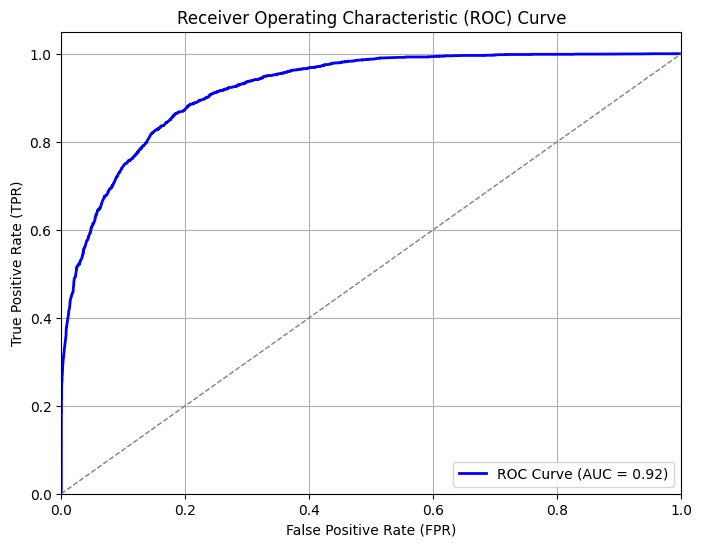

In [242]:

# Assuming y_test are the true labels and y_pred_prob are the predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

AUC score is 0,92. This indicates that the binary classifier is effectively distinguishing between positive and negative instances across different decision thresholds, demonstrating robust performance.

### Confusion Matrix

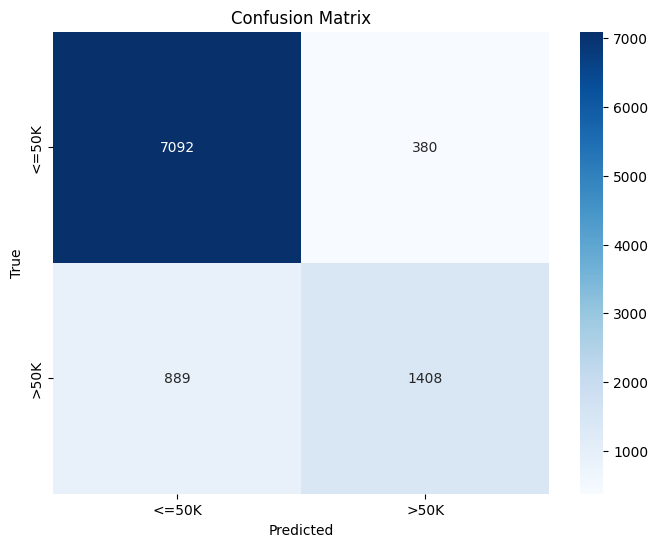

In [247]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [246]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7472
           1       0.79      0.61      0.69      2297

    accuracy                           0.87      9769
   macro avg       0.84      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769



### Weighted average precision & Accuracy

In [249]:
# Extract precision and support for each class
report_2 = classification_report(y_test, y_pred, output_dict=True)

precision = {cls: report_2[str(cls)]['precision'] for cls in report_2 if cls.isdigit()}
support = {cls: report_2[str(cls)]['support'] for cls in report_2 if cls.isdigit()}

# Calculate weighted average precision
weighted_avg_precision = sum(precision[cls] * support[cls] for cls in precision) / sum(support.values())
accuracy = accuracy_score(y_test, y_pred)

print(f"Weighted Average Precision: {weighted_avg_precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Weighted Average Precision: 0.86
Accuracy: 0.87
